# Overview

 This is my first time participating in a Kaggle. I have used Kaggle competitions as learning resources in the past, and am now determined to become a competitor myself. Please see my [blog post](https://medium.com/@levimjoseph/getting-started-with-kaggle-competitions-63bee65fb31d) on the matter.  

Much has been written about the Titanic competition on Kaggle. There are several wonderful notebook write ups, such as Alexis Cook's [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial). Therefore, I will not belabor my introduction.  

That said, the Titanic Competition is a classification problem where we are tasked with predicting whether or not a passenger survived the ship's sinking.

# Setup

In [1]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns

seed = 42

In [2]:
# import train and test set
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
# confirm train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# confirm test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---
# EDA

In [5]:
# get basic info on the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# get basic info on the test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# percentage of test set to overall set
perc = round((len(test_df.index) / (len(train_df.index) + len(test_df.index)) * 100),2)
print(f'Percentage of data in test set: {perc}%')

Percentage of data in test set: 31.93%


We see that the **train_df** has 891 rows and 11 columns. 10 of these columns will become *features*, while 1 (Survived) will become the *dependent variable*.

We see that the **test_df** has 418 rows and 10 columns. 31.93% of our overall data is in the test set.

**Data Dictionary:**
* PassengerId - int. Key.
* Survived - int. Survival. 0 = No, 1 = Yes. Boolean.
* Pclass - int. Ticket class.
* Name - str. Name of passenger.
* Sex - str. Sex of passenger.
* Age - float. Age of passenger. If age is estimated, takes xx.5.
* SibSp - int. # of siblings/spouses on board. 
* Parch - int. # of parents/ children aboard the titanic.
* Ticket - str. Ticket number.
* Fare - float. Fare paid by passenger.
* Cabin - str. Cabin of passenger.
* Embarked - str. Port of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton.

**Initial Hypotheses:**
* Young children will survive
* Young women will survive.
* Rich people will survive.
* Location on ship matters.
* Officers will not survive.

## Categorical Variables

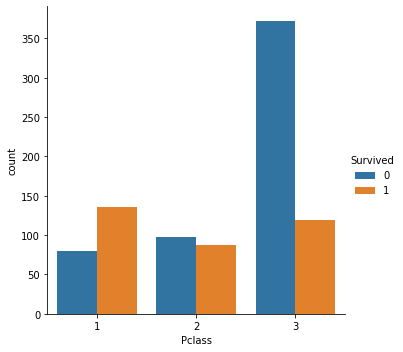

In [8]:
# PClass vs Survived
sns.catplot(x='Pclass', hue='Survived', data=train_df, kind='count')

As expected, Pclass appears to be correlated with survival.

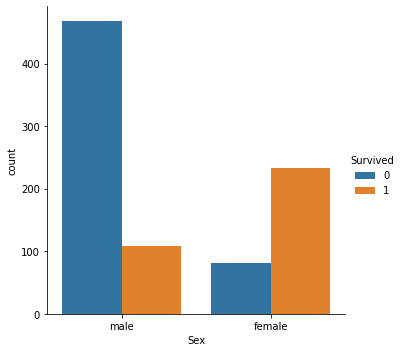

In [9]:
# Sex vs Survived
sns.catplot(x='Sex', hue='Survived', data=train_df, kind='count')

As expected, Sex appears to be correlated with survival.

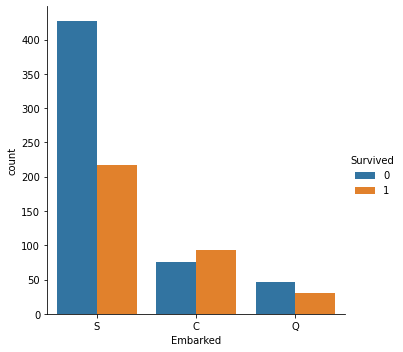

In [10]:
# Sex vs Survived
sns.catplot(x='Embarked', hue='Survived', data=train_df, kind='count')

This is an initially surprising finding, though I think perhaps Embarked may be correlated with Pclass.

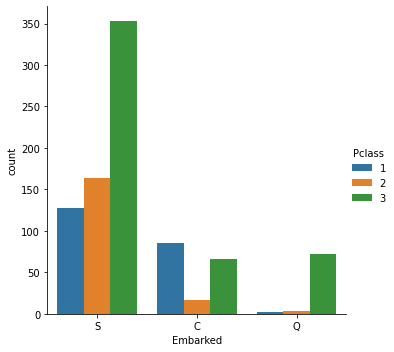

In [11]:
# Sex vs Survived
sns.catplot(x='Embarked', hue='Pclass', data=train_df, kind='count')

As expected, S is disproportionately 3rd class. I would consider this a spurious correlation as Pclass is likely the underlying structure driving survival in this case (phrased differently, I do not think being from C or Q means you are a better swimmer).

## Quantitative Variables

Initial categorical variables are as follows:
* Age
* SibSp
* Parch
* Fare

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Nulls

---
# Modeling

## Data Cleaning

## Feature Engineering

## Train-Test Split

---
# Submission